In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Exploratory Data Analysis: Data Pre-processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

df = pd.read_csv('/content/drive/MyDrive/NIT Agartala  Internships /Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
df.shape

(20000, 11)

In [5]:
df.isnull().sum() # check for missing values

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [6]:
# keep only the required columns
df = df[['post_text']]
df.head(10)

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...
5,Making packing lists is my new hobby... #movin...
6,At what point does keeping stuff for nostalgic...
7,Currently in the finding-boxes-of-random-shit ...
8,"Can't be bothered to cook, take away on the wa..."
9,RT @itventsnews: ITV releases promo video for ...


## Visualize the data before Text Cleaning

In [7]:
from wordcloud import WordCloud
def wordcloud_vis(column):
  mostcommon = nltk.FreqDist(df[column]).most_common(100)
  wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(str(mostcommon))
  fig = plt.figure(figsize=(30,10), facecolor='white')
  plt.imshow(wordcloud) #, interpolation="bilinear")
  plt.axis('off')
  plt.show()


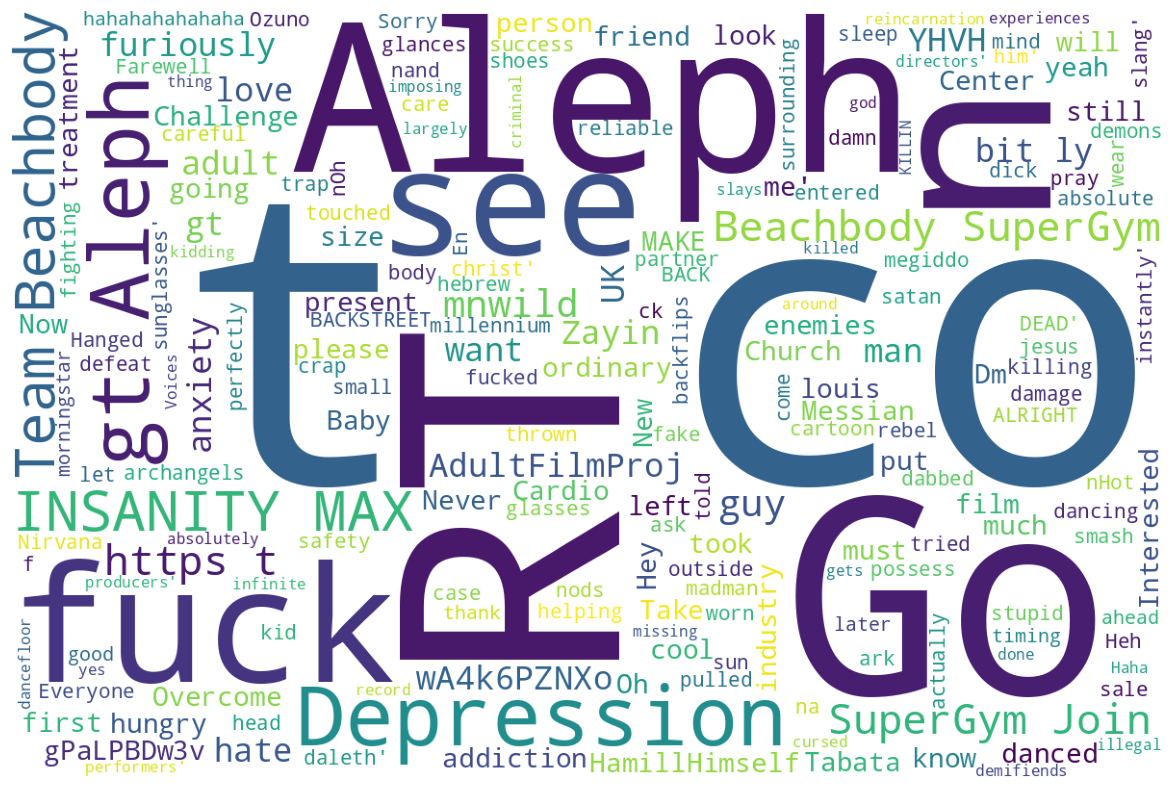

In [8]:
#Plot the word-cloud before removing stopwords, performing lemmatization
from wordcloud import WordCloud
wordcloud_vis('post_text')

In [9]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [10]:
df.shape

(20000, 1)

### Text Cleaning:
Remove punctuation, numbers, stop words and convert tweets to lower case

In [11]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<ipython-input-11-1f0259b0d5e2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("\d","")
<ipython-input-11-1f0259b0d5e2>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("[^\w\s]","")


Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

**TextBlob** provides a more user-friendly API for common NLP tasks such as **sentiment analysis, part-of-speech tagging, and text classification**.

**NLTK** provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning.

In [ ]:
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [13]:
# Remove stop words
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df

,post_text
0,years since diagnosed anxiety depression today...
1,sunday need break im planning spend little tim...
2,awake tired need sleep brain ideas
3,rt sewhq retro bears make perfect gifts great ...
4,hard say whether packing lists making life eas...
...,...
19995,day without sunshine like night
19996,borens laws charge ponder trouble delegate dou...
19997,flow chart thoroughly oversold piece program d...
19998,ships safe harbor never meant stay


### Lemmatization and Word tokenization

In [15]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [16]:
df

,post_text
0,years since diagnosed anxiety depression today...
1,sunday need break im planning spend little tim...
2,awake tired need sleep brain ideas
3,rt sewhq retro bears make perfect gifts great ...
4,hard say whether packing lists making life eas...
...,...
19995,day without sunshine like night
19996,borens laws charge ponder trouble delegate dou...
19997,flow chart thoroughly oversold piece program d...
19998,ships safe harbor never meant stay


In [17]:
# tokenize each word
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
df.head()

,post_text,tokens
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,..."
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit..."
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]"
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l..."


# Sentiment Analysis
We will employ TextBlob, a Python library, to conduct sentiment analysis on our preprocessed text data. The objective is to classify each tweet as either exhibiting signs of depression or not, based on its sentiment score. Sentiment analysis is an NLP technique that entails analyzing the emotional tone of text, with the goal of automatically classifying it as positive, negative, or neutral, depending on the words and phrases used. TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize them as depressed or non-depressed based on their sentiment scores. For example, a tweet with a sentiment score of -0.8 might be classified as depressed, while a tweet with a sentiment score of +0.5 may be classified as non-depressed.

In [19]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [20]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [21]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000,0.875000
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833


In [22]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",0.100000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",-0.400000
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",-0.045833
5,making packing lists new hobby movinghouse,"[making, packing, lists, new, hobby, movinghouse]",0.136364


In [23]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",0.100000,Positive
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,Negative
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",-0.400000,Negative
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000,Positive
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",-0.045833,Negative


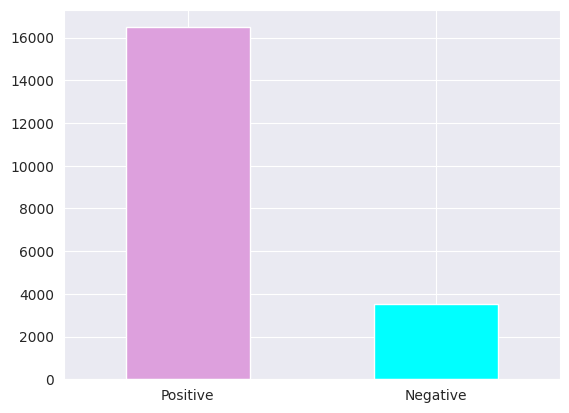

In [24]:
result = df4["Sentiment"].value_counts()

sns.set_style("darkgrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [25]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3517,3517,3517
Positive,16483,16483,16483


In [26]:
df4.groupby("polarity").max().head(5)
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,worst bumbling stumbling statement ive seen in...,"[worst, bumbling, stumbling, statement, ive, s...",Negative
-0.900000,sickening httpstcokoohihbrx,"[sickening, httpstcokoohihbrx]",Negative
-0.900000,keitholbermann thats one word would go traitor...,"[keitholbermann, thats, one, word, would, go, ...",Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,"[gop, lawmaker, asks, twitter, vote, whether, ...",Negative
-0.857143,sick perceived anything everything im told dri...,"[sick, perceived, anything, everything, im, to...",Negative


## Visualize the results

In [27]:
from wordcloud import WordCloud
def wordcloud_vis(column):
  mostcommon = nltk.FreqDist(df4[column]).most_common(100)
  wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(str(mostcommon))
  fig = plt.figure(figsize=(30,10), facecolor='white')
  plt.imshow(wordcloud) #, interpolation="bilinear")
  plt.axis('off')
  plt.show()


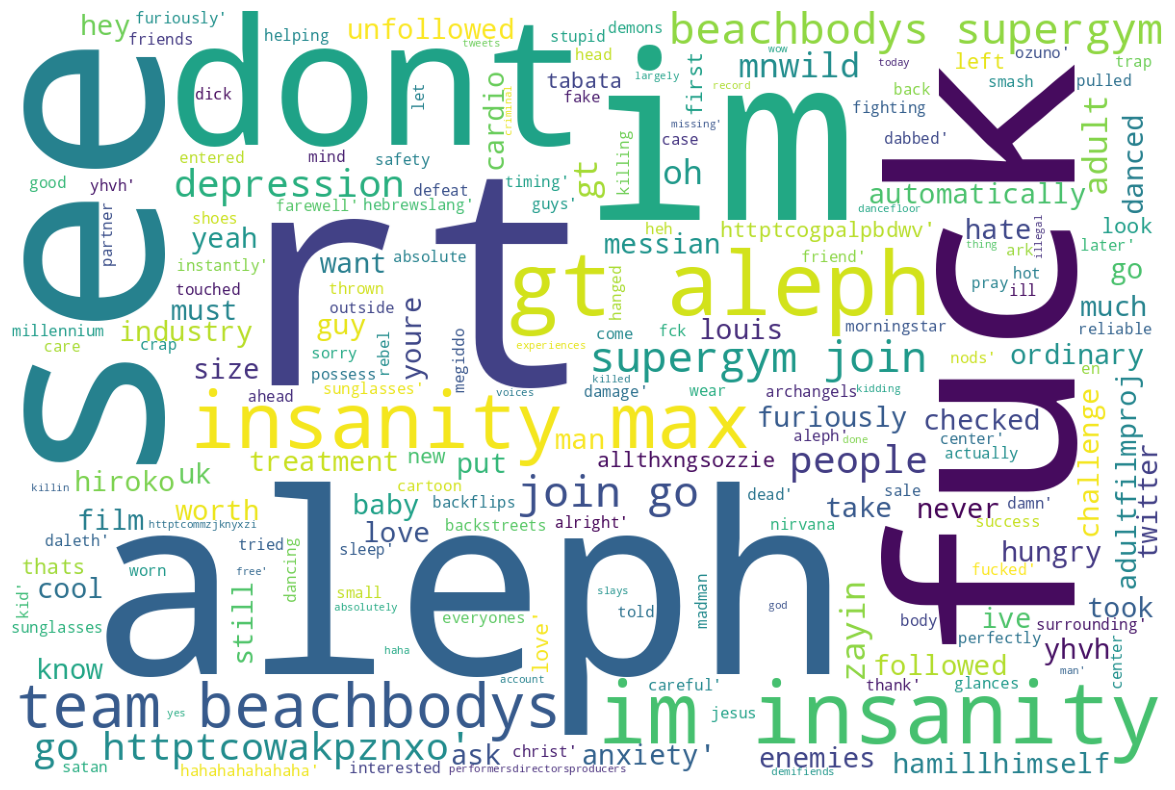

In [28]:
#Plot the word-cloud before removing stopwords, performing lemmatization
wordcloud_vis('post_text')

## Most Commons words useds

In [29]:
text = " ".join(i for i in df.post_text)

In [30]:
print("\n",
      "\n",text.count("rt"),
      "\n",text.count("im"),
      "\n",text.count("one"),
      "\n",text.count("depression"),
      "\n",text.count("dont"),
      "\n",text.count("time"),
      "\n",text.count("love"),
      "\n",text.count("know"),
      "\n",text.count("thank"),
      "\n",text.count("people"),
     )


 
 6630 
 3328 
 2063 
 950 
 887 
 785 
 754 
 729 
 702 
 593


In [31]:
data = {
    "title": ["rt", "im" ,"one", "depression", "dont", "time",
              "love","know","thank", "people"],
    "count": [6630, 3328 ,2063, 950, 887, 785, 754, 729, 702, 593],
}

In [32]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,rt,6630
1,im,3328
2,one,2063
3,depression,950
4,dont,887
5,time,785
6,love,754
7,know,729
8,thank,702
9,people,593


## Visualization of data usings Bar Plots

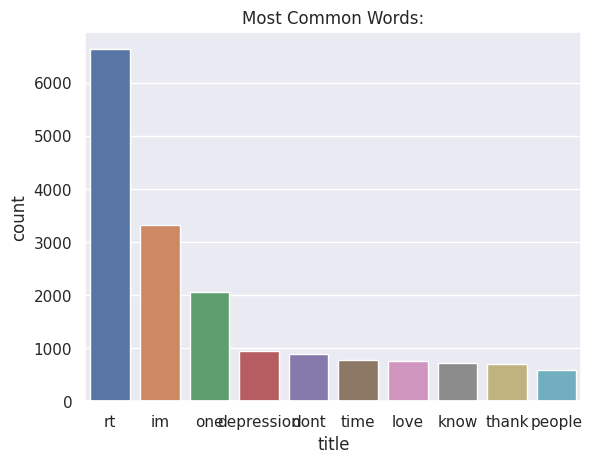

In [33]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

## Visualization of data usings Pi Plots

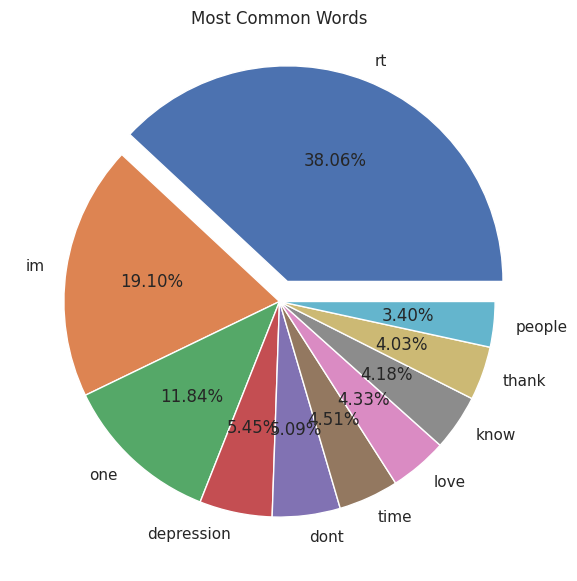

In [34]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0]
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

Text(0.5, 1.0, 'Polarity Distribution')

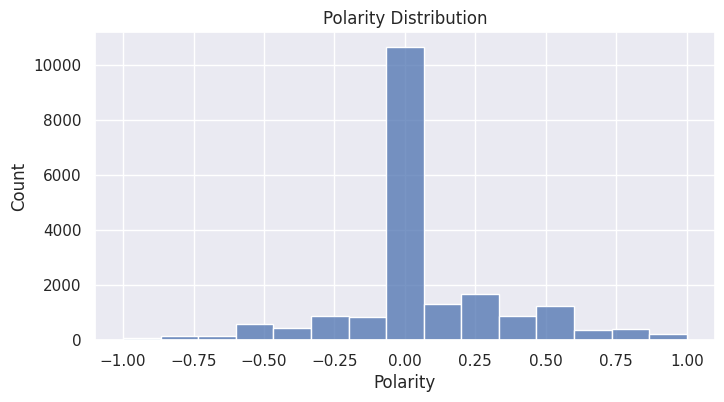

In [35]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

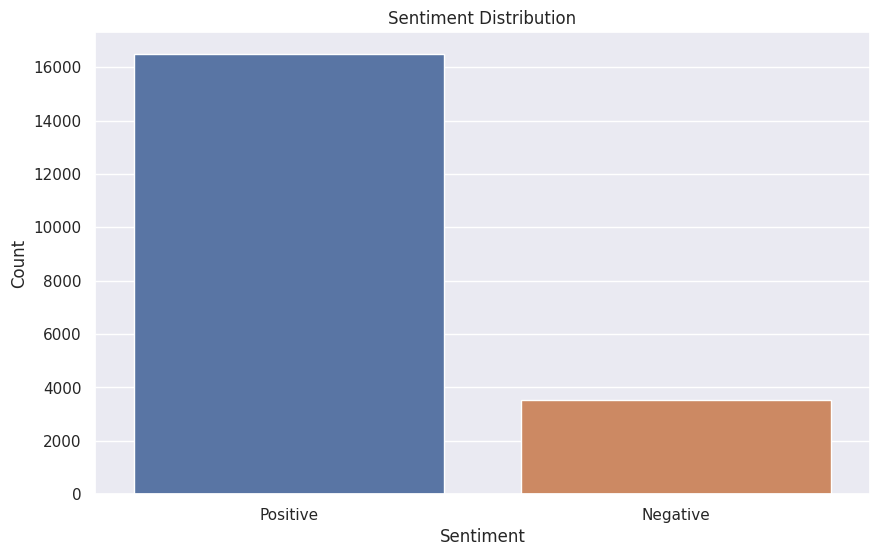

In [36]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [39]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Decision tree classifier Algorithm

In [40]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
#Predicting the test set result
y_pred= clf.predict(X_test)
# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)

In [44]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))
print('Accuracy:', accuracy*100)

              precision    recall  f1-score   support

    Negative       0.80      0.90      0.85       718
    Positive       0.98      0.95      0.96      3282

    accuracy                           0.94      4000
   macro avg       0.89      0.92      0.91      4000
weighted avg       0.95      0.94      0.94      4000

Accuracy: 94.175


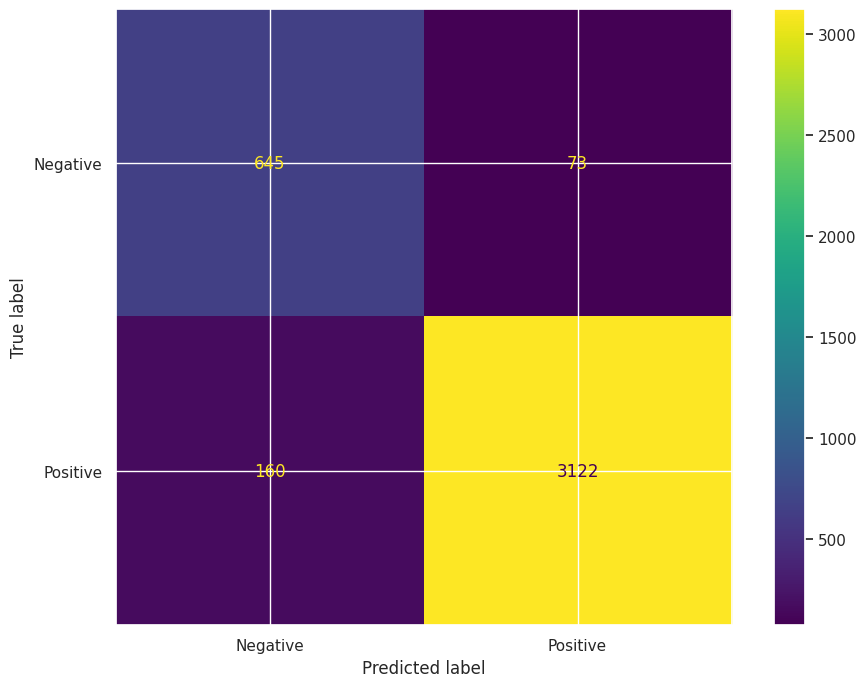

In [45]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [46]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 94.18 %


In [47]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

Positive    16483
Negative     3517
Name: Sentiment, dtype: int64

# Random Forest Classifier

In [48]:
# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)

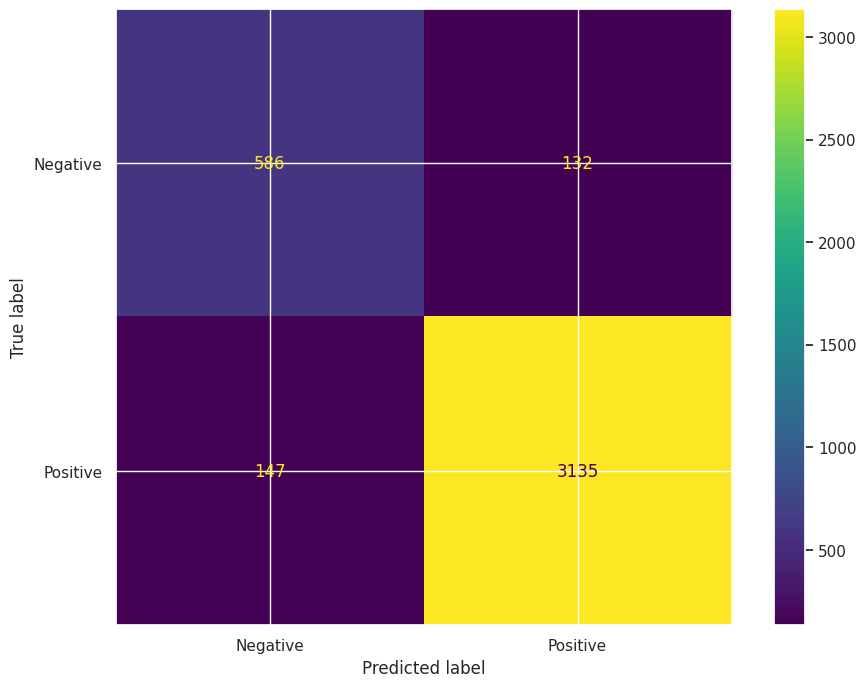

In [54]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

In [55]:
# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))
print('Accuracy:', accuracy*100)

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81       718
    Positive       0.96      0.96      0.96      3282

    accuracy                           0.93      4000
   macro avg       0.88      0.89      0.88      4000
weighted avg       0.93      0.93      0.93      4000

Accuracy: 94.175


# KNN Classifier

In [56]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)

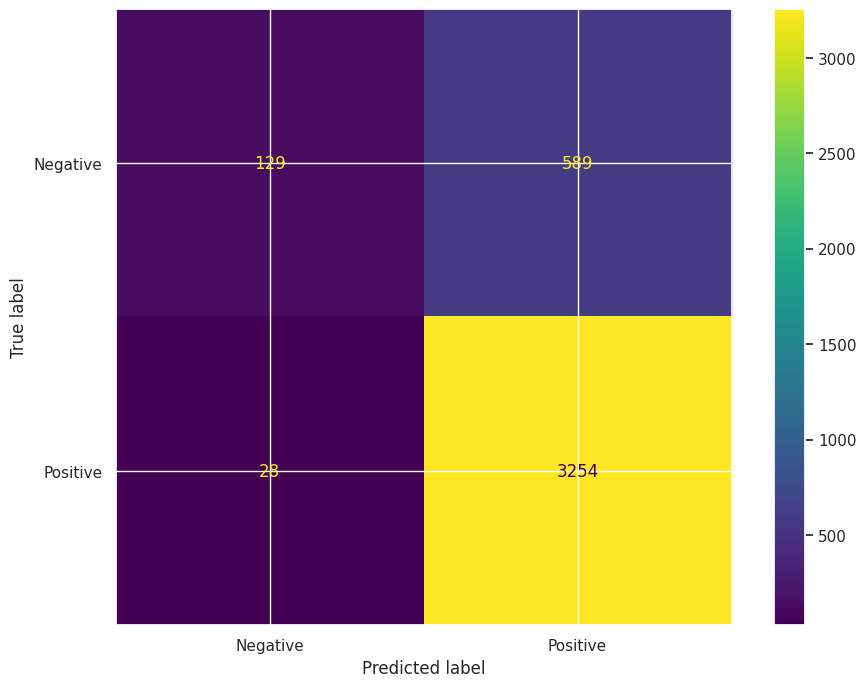

In [58]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [59]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))
print('Accuracy:', accuracy*100)

              precision    recall  f1-score   support

    Negative       0.82      0.18      0.29       718
    Positive       0.85      0.99      0.91      3282

    accuracy                           0.85      4000
   macro avg       0.83      0.59      0.60      4000
weighted avg       0.84      0.85      0.80      4000

Accuracy: 84.575


# Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

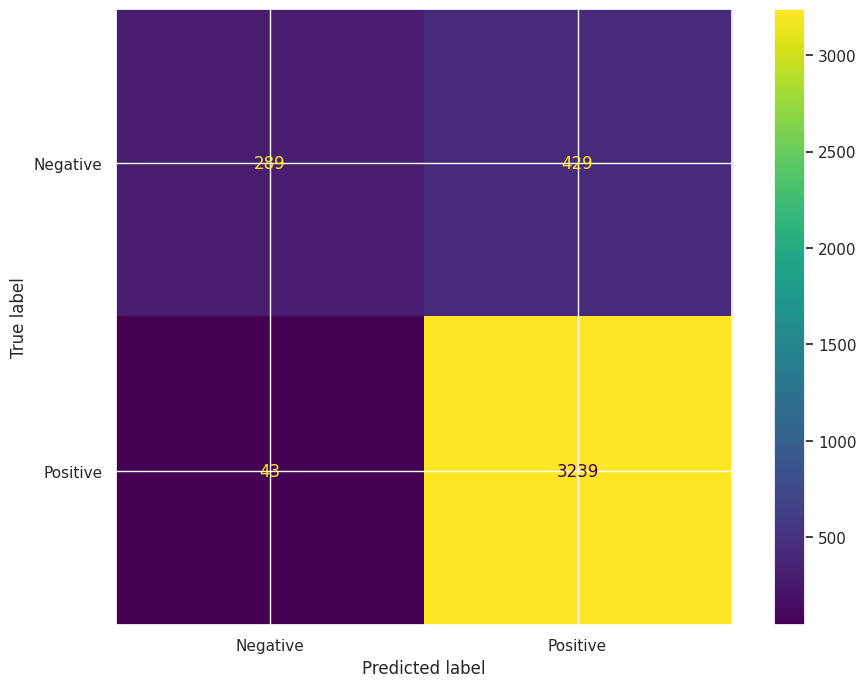

In [61]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [62]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))
print('Accuracy:', accuracy*100)

              precision    recall  f1-score   support

    Negative       0.87      0.40      0.55       718
    Positive       0.88      0.99      0.93      3282

    accuracy                           0.88      4000
   macro avg       0.88      0.69      0.74      4000
weighted avg       0.88      0.88      0.86      4000

Accuracy: 88.2
